### Dagger 

In [9]:
import tempfile
import numpy as np
import gymnasium as gym
from stable_baselines3.common.evaluation import evaluate_policy
from imitation.algorithms import bc
from imitation.algorithms.dagger import SimpleDAggerTrainer
from imitation.util.util import make_vec_env

# Initialize a random number generator
rng = np.random.default_rng(0)

# Create the environment
env = make_vec_env("CartPole-v1", n_envs=1, rng=rng)

# Define a simple expert policy (use stable-baselines3 pre-trained model)
from stable_baselines3 import PPO

expert_model = PPO("MlpPolicy", env, verbose=0)
expert_model.learn(10_000)  # Train the expert policy

# Define a behavioral cloning trainer
bc_trainer = bc.BC(
    observation_space=env.observation_space,
    action_space=env.action_space,
    rng=rng,
)

# Create a temporary directory for DAgger
with tempfile.TemporaryDirectory(prefix="dagger_example_") as tmpdir:
    print(f"Temporary directory: {tmpdir}")
    
    # Create the DAgger trainer
    dagger_trainer = SimpleDAggerTrainer(
        venv=env,
        scratch_dir=tmpdir,
        expert_policy=expert_model.policy,  # Expert policy is taken from PPO
        bc_trainer=bc_trainer,
        rng=rng,
    )
    
    # Train the DAgger model
    dagger_trainer.train(8_000)

# Evaluate the DAgger-trained policy
reward, _ = evaluate_policy(dagger_trainer.policy, env, n_eval_episodes=10)
print("Reward after DAgger training:", reward)


Temporary directory: C:\Users\Sorbonne\AppData\Local\Temp\dagger_example_j1r5a7he


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000693 |
|    entropy        | 0.693     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 72.5      |
|    loss           | 0.692     |
|    neglogp        | 0.693     |
|    prob_true_act  | 0.5       |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 33        |
|    return_mean    | 20.6      |
|    return_min     | 11        |
|    return_std     | 7.71      |
---------------------------------


152batch [00:00, 206.72batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000352 |
|    entropy        | 0.352     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 86.7      |
|    loss           | 0.269     |
|    neglogp        | 0.27      |
|    prob_true_act  | 0.801     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 145       |
|    return_mean    | 116       |
|    return_min     | 89        |
|    return_std     | 19.3      |
---------------------------------


216batch [00:01, 161.15batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000233 |
|    entropy        | 0.233     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 94.1      |
|    loss           | 0.189     |
|    neglogp        | 0.189     |
|    prob_true_act  | 0.869     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 272       |
|    return_mean    | 144       |
|    return_min     | 78        |
|    return_std     | 71        |
---------------------------------


280batch [00:01, 143.53batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000119 |
|    entropy        | 0.119     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 103       |
|    loss           | 0.133     |
|    neglogp        | 0.133     |
|    prob_true_act  | 0.918     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 209       |
|    return_mean    | 190       |
|    return_min     | 156       |
|    return_std     | 18        |
---------------------------------


404batch [00:02, 170.37batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -0.00013 |
|    entropy        | 0.13     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 120      |
|    loss           | 0.138    |
|    neglogp        | 0.138    |
|    prob_true_act  | 0.912    |
|    samples_so_far | 32       |
| rollout/          |          |
|    return_max     | 211      |
|    return_mean    | 177      |
|    return_min     | 154      |
|    return_std     | 20       |
--------------------------------


492batch [00:02, 186.88batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000173 |
|    entropy        | 0.173     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 148       |
|    loss           | 0.182     |
|    neglogp        | 0.182     |
|    prob_true_act  | 0.876     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 403       |
|    return_mean    | 291       |
|    return_min     | 177       |
|    return_std     | 72.1      |
---------------------------------


485batch [00:02, 230.88batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 500      |
|    ent_loss       | -0.00017 |
|    entropy        | 0.17     |
|    epoch          | 3        |
|    l2_loss        | 0        |
|    l2_norm        | 173      |
|    loss           | 0.0987   |
|    neglogp        | 0.0988   |
|    prob_true_act  | 0.918    |
|    samples_so_far | 16032    |
| rollout/          |          |
|    return_max     | 367      |
|    return_mean    | 256      |
|    return_min     | 164      |
|    return_std     | 75.1     |
--------------------------------


576batch [00:04, 137.59batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -4.55e-05 |
|    entropy        | 0.0455    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 177       |
|    loss           | 0.0578    |
|    neglogp        | 0.0578    |
|    prob_true_act  | 0.967     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 335       |
|    return_mean    | 244       |
|    return_min     | 159       |
|    return_std     | 75.6      |
---------------------------------


477batch [00:02, 235.17batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -6.69e-05 |
|    entropy        | 0.0669    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 196       |
|    loss           | 0.0449    |
|    neglogp        | 0.0449    |
|    prob_true_act  | 0.964     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 242       |
|    return_min     | 159       |
|    return_std     | 130       |
---------------------------------


668batch [00:04, 153.45batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000119 |
|    entropy        | 0.119     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 203       |
|    loss           | 0.0703    |
|    neglogp        | 0.0705    |
|    prob_true_act  | 0.942     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 434       |
|    return_mean    | 319       |
|    return_min     | 159       |
|    return_std     | 107       |
---------------------------------


489batch [00:02, 236.62batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -0.000103 |
|    entropy        | 0.103     |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 221       |
|    loss           | 0.094     |
|    neglogp        | 0.0941    |
|    prob_true_act  | 0.933     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 321       |
|    return_min     | 187       |
|    return_std     | 106       |
---------------------------------


748batch [00:04, 151.85batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000104 |
|    entropy        | 0.104     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 229       |
|    loss           | 0.103     |
|    neglogp        | 0.103     |
|    prob_true_act  | 0.931     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 254       |
|    return_mean    | 204       |
|    return_min     | 179       |
|    return_std     | 26.7      |
---------------------------------


483batch [00:02, 210.09batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -6.82e-05 |
|    entropy        | 0.0682    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 243       |
|    loss           | 0.0536    |
|    neglogp        | 0.0536    |
|    prob_true_act  | 0.96      |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 282       |
|    return_mean    | 227       |
|    return_min     | 181       |
|    return_std     | 37.7      |
---------------------------------


812batch [00:05, 154.44batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -2e-05   |
|    entropy        | 0.02     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 252      |
|    loss           | 0.00854  |
|    neglogp        | 0.00856  |
|    prob_true_act  | 0.992    |
|    samples_so_far | 32       |
| rollout/          |          |
|    return_max     | 396      |
|    return_mean    | 239      |
|    return_min     | 161      |
|    return_std     | 83.4     |
--------------------------------


489batch [00:03, 219.52batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -5.04e-05 |
|    entropy        | 0.0504    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 265       |
|    loss           | 0.0275    |
|    neglogp        | 0.0275    |
|    prob_true_act  | 0.977     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 374       |
|    return_mean    | 235       |
|    return_min     | 151       |
|    return_std     | 87.8      |
---------------------------------


916batch [00:05, 157.66batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -1.05e-05 |
|    entropy        | 0.0105    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 273       |
|    loss           | 0.00274   |
|    neglogp        | 0.00275   |
|    prob_true_act  | 0.997     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 376       |
|    return_min     | 164       |
|    return_std     | 124       |
---------------------------------


490batch [00:03, 222.19batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -3.19e-05 |
|    entropy        | 0.0319    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 281       |
|    loss           | 0.0244    |
|    neglogp        | 0.0244    |
|    prob_true_act  | 0.982     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 338       |
|    return_mean    | 243       |
|    return_min     | 164       |
|    return_std     | 72.3      |
---------------------------------


1000batch [00:06, 156.78batch/s]


Reward after DAgger training: 281.9


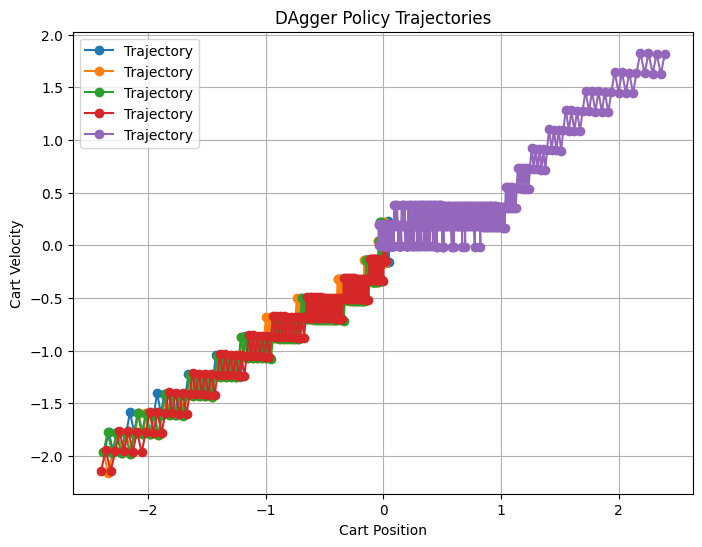

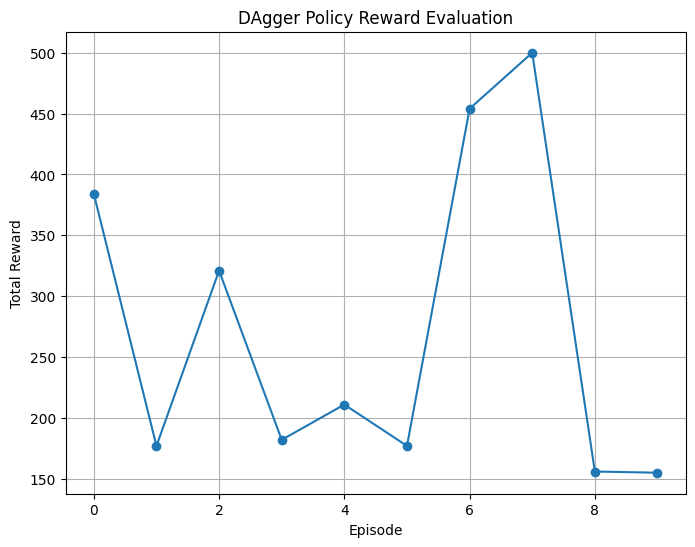

Average Reward: 271.70


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize policy performance over multiple episodes
def plot_policy_trajectories(policy, env, title="Policy Trajectories", num_episodes=5):
    trajectories = []
    for _ in range(num_episodes):
        obs = env.reset()
        done = False
        trajectory = []
        while not done:
            # Predict the action using the trained policy
            action, _ = policy.predict(obs, deterministic=True)
            
            # Append the current position (Cart Position, Cart Velocity)
            env_state = env.get_attr("state")[0]  # Access the state of the underlying environment
            trajectory.append(env_state)
            
            # Step the environment
            obs, _, done, _ = env.step(action)
        trajectories.append(trajectory)

    # Plot the trajectories
    plt.figure(figsize=(8, 6))
    for trajectory in trajectories:
        trajectory = np.array(trajectory)
        plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', label="Trajectory")
    plt.title(title)
    plt.xlabel("Cart Position")
    plt.ylabel("Cart Velocity")
    plt.legend()
    plt.grid()
    plt.show()

# Function to evaluate and plot rewards
def plot_rewards(policy, env, title="Reward Evaluation", num_episodes=10):
    rewards = []
    for _ in range(num_episodes):
        obs = env.reset()
        done = False
        episode_reward = 0
        while not done:
            # Predict the action using the trained policy
            action, _ = policy.predict(obs, deterministic=True)
            
            # Step the environment and accumulate reward
            obs, reward, done, _ = env.step(action)
            episode_reward += reward
        rewards.append(episode_reward)

    # Plot rewards
    plt.figure(figsize=(8, 6))
    plt.plot(rewards, marker='o')
    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.grid()
    plt.show()
    print(f"Average Reward: {np.mean(rewards):.2f}")

# Plot the DAgger policy trajectories
plot_policy_trajectories(dagger_trainer.policy, env, title="DAgger Policy Trajectories")

# Plot the rewards achieved by the DAgger-trained policy
plot_rewards(dagger_trainer.policy, env, title="DAgger Policy Reward Evaluation")


In [6]:
!pip install imitation --default-timeout=100


  Using cached imitation-1.0.0-py3-none-any.whl.metadata (14 kB)
  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached seals-0.2.1-py3-none-any.whl.metadata (8.9 kB)
  Using cached sacred-0.8.6-py2.py3-none-any.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/953.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/953.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/953.9 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/953.9 kB ? eta -:--:--
   --------------------- ------------------ 524.3/953.9 kB 2.4 MB/s eta 0:00:01
   -------------------------------- ------- 786.4/953.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 953.9/953.9 kB 1.1 MB/s eta 0:00:00
   ---

In [2]:
!pip install numpy==1.26.4
!pip install matplotlib==3.9.2
!pip install gymnasium==0.29.1
!pip install stable-baselines3==2.4.0
!pip install imitation==1.0.0


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.4 which is incompatible.


  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl (7.8 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


  You can safely remove it manually.
  You can safely remove it manually.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from stable_baselines3.common.evaluation import evaluate_policy
from imitation.algorithms.bc import BC
from imitation.algorithms.dagger import SimpleDAggerTrainer
from imitation.policies.serialize import load_policy
from imitation.util.util import make_vec_env
import tempfile

# Environnement et Expert
def setup_environment(env_name="CartPole-v1", expert_name="ppo-huggingface", org="HumanCompatibleAI"):
    """
    Crée l'environnement et charge l'expert pré-entraîné.
    """
    env = make_vec_env(env_name, rng=np.random.default_rng(), n_envs=1)
    expert = load_policy(
        expert_name,
        organization=org,
        env_name=env_name,
        venv=env
    )
    return env, expert

# Configuration et Entraînement de DAgger avec suivi des récompenses
def train_with_dagger(env, expert, steps=300, eval_episodes=10, eval_intervals=30):
    """
    Entraîne un agent avec l'algorithme DAgger et collecte les récompenses au fil des étapes.
    """
    # Initialisation de l'entraîneur de Clonage Comportemental
    bc_trainer = BC(
        observation_space=env.observation_space,
        action_space=env.action_space,
        rng=np.random.default_rng(),
    )
    
    rewards_over_time = []  # Stockage des récompenses moyennes

    with tempfile.TemporaryDirectory(prefix="dagger_training_") as tmpdir:
        print(f"Répertoire temporaire pour l'entraînement : {tmpdir}")
        
        # Initialisation de l'entraîneur DAgger
        dagger_trainer = SimpleDAggerTrainer(
            venv=env,
            scratch_dir=tmpdir,
            expert_policy=expert,
            bc_trainer=bc_trainer,
            rng=np.random.default_rng(),
        )
        
        for step in range(0, steps + 1, eval_intervals):
            # Entraîner sur un intervalle
            dagger_trainer.train(eval_intervals)

            # Évaluer la politique entraînée
            rewards, _ = evaluate_policy(dagger_trainer.policy, env, n_eval_episodes=eval_episodes, return_episode_rewards=True)
            mean_reward = np.mean(rewards)
            print(f"Étape {step}/{steps}, Récompense moyenne : {mean_reward}")
            rewards_over_time.append(mean_reward)

    return dagger_trainer, rewards_over_time


c:\Users\Sorbonne\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Tracé des récompenses
def plot_rewards(rewards, steps, eval_intervals):
    """
    Trace la courbe de récompense en fonction des étapes.
    """
    plt.figure(figsize=(10, 6))
    x = np.arange(0, steps + 1, eval_intervals)
    plt.plot(x[:len(rewards)], rewards, marker='o')
    plt.title("Évolution de la récompense moyenne pendant l'entraînement DAgger")
    plt.xlabel("Étapes d'entraînement")
    plt.ylabel("Récompense moyenne")
    plt.grid()
    plt.show()

Initialisation de l'environnement et chargement de l'expert...
Entraînement avec DAgger en cours...
Répertoire temporaire pour l'entraînement : C:\Users\Sorbonne\AppData\Local\Temp\dagger_training_ou89wo7n


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 162.97 examples/s]
0batch [00:00, ?batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -0.0011  |
|    entropy        | 1.1      |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 68.5     |
|    loss           | 1.1      |
|    neglogp        | 1.1      |
|    prob_true_act  | 0.333    |
|    samples_so_far | 32       |
| rollout/          |          |
|    return_max     | -200     |
|    return_mean    | -200     |
|    return_min     | -200     |
|    return_std     | 0        |
--------------------------------


72batch [00:01, 67.85batch/s]]


Étape 0/300, Récompense moyenne : -200.0


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 211.61 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000729 |
|    entropy        | 0.729     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 73.9      |
|    loss           | 0.732     |
|    neglogp        | 0.733     |
|    prob_true_act  | 0.598     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -200      |
|    return_mean    | -200      |
|    return_min     | -200      |
|    return_std     | 0         |
---------------------------------


148batch [00:01, 113.96batch/s]


Étape 10/300, Récompense moyenne : -200.0


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 394.72 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000462 |
|    entropy        | 0.462     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 80.4      |
|    loss           | 0.44      |
|    neglogp        | 0.441     |
|    prob_true_act  | 0.718     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -200      |
|    return_mean    | -200      |
|    return_min     | -200      |
|    return_std     | 0         |
---------------------------------


224batch [00:01, 127.63batch/s]


Étape 20/300, Récompense moyenne : -200.0


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 182.69 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000296 |
|    entropy        | 0.296     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 89.2      |
|    loss           | 0.222     |
|    neglogp        | 0.223     |
|    prob_true_act  | 0.837     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -200      |
|    return_mean    | -200      |
|    return_min     | -200      |
|    return_std     | 0         |
---------------------------------


300batch [00:02, 147.27batch/s]


Étape 30/300, Récompense moyenne : -193.2


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 154.19 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000347 |
|    entropy        | 0.347     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 105       |
|    loss           | 0.35      |
|    neglogp        | 0.35      |
|    prob_true_act  | 0.789     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -200      |
|    return_mean    | -200      |
|    return_min     | -200      |
|    return_std     | 0         |
---------------------------------


372batch [00:02, 164.98batch/s]


Étape 40/300, Récompense moyenne : -107.1


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<?, ? examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000314 |
|    entropy        | 0.314     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 140       |
|    loss           | 0.22      |
|    neglogp        | 0.22      |
|    prob_true_act  | 0.87      |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -131      |
|    return_mean    | -157      |
|    return_min     | -200      |
|    return_std     | 23        |
---------------------------------


448batch [00:03, 117.08batch/s]


Étape 50/300, Récompense moyenne : -131.2


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 106.22 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000231 |
|    entropy        | 0.231     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 169       |
|    loss           | 0.26      |
|    neglogp        | 0.261     |
|    prob_true_act  | 0.834     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -97       |
|    return_mean    | -139      |
|    return_min     | -157      |
|    return_std     | 21.3      |
---------------------------------


489batch [00:04, 125.66batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -0.000193 |
|    entropy        | 0.193     |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 190       |
|    loss           | 0.146     |
|    neglogp        | 0.147     |
|    prob_true_act  | 0.909     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -89       |
|    return_mean    | -126      |
|    return_min     | -151      |
|    return_std     | 26.9      |
---------------------------------


524batch [00:06, 82.12batch/s] 


Étape 60/300, Récompense moyenne : -123.9


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 93.88 examples/s] 
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000126 |
|    entropy        | 0.126     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 191       |
|    loss           | 0.0667    |
|    neglogp        | 0.0669    |
|    prob_true_act  | 0.947     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -90       |
|    return_mean    | -136      |
|    return_min     | -185      |
|    return_std     | 33        |
---------------------------------


493batch [00:05, 136.62batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -7.14e-05 |
|    entropy        | 0.0714    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 206       |
|    loss           | 0.0238    |
|    neglogp        | 0.0239    |
|    prob_true_act  | 0.979     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -86       |
|    return_mean    | -102      |
|    return_min     | -135      |
|    return_std     | 17.8      |
---------------------------------


600batch [00:07, 80.81batch/s] 


Étape 70/300, Récompense moyenne : -111.5


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 64.03 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -6.18e-05 |
|    entropy        | 0.0618    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 209       |
|    loss           | 0.0159    |
|    neglogp        | 0.016     |
|    prob_true_act  | 0.985     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -85       |
|    return_mean    | -134      |
|    return_min     | -164      |
|    return_std     | 29.1      |
---------------------------------


496batch [00:04, 154.50batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -0.000137 |
|    entropy        | 0.137     |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 221       |
|    loss           | 0.0934    |
|    neglogp        | 0.0935    |
|    prob_true_act  | 0.94      |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -86       |
|    return_mean    | -121      |
|    return_min     | -152      |
|    return_std     | 23.7      |
---------------------------------


672batch [00:06, 109.51batch/s]


Étape 80/300, Récompense moyenne : -118.9


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 219.31 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000145 |
|    entropy        | 0.145     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 225       |
|    loss           | 0.0969    |
|    neglogp        | 0.097     |
|    prob_true_act  | 0.928     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -110      |
|    return_mean    | -127      |
|    return_min     | -154      |
|    return_std     | 17.8      |
---------------------------------


497batch [00:04, 124.31batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -0.000146 |
|    entropy        | 0.146     |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 238       |
|    loss           | 0.115     |
|    neglogp        | 0.115     |
|    prob_true_act  | 0.924     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -86       |
|    return_mean    | -118      |
|    return_min     | -146      |
|    return_std     | 26.9      |
---------------------------------


748batch [00:07, 104.43batch/s]


Étape 90/300, Récompense moyenne : -119.5


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 111.35 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -8.63e-05 |
|    entropy        | 0.0863    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 244       |
|    loss           | 0.0604    |
|    neglogp        | 0.0605    |
|    prob_true_act  | 0.956     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -83       |
|    return_mean    | -106      |
|    return_min     | -142      |
|    return_std     | 24.5      |
---------------------------------


491batch [00:03, 184.41batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -0.000108 |
|    entropy        | 0.108     |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 258       |
|    loss           | 0.0481    |
|    neglogp        | 0.0482    |
|    prob_true_act  | 0.96      |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -88       |
|    return_mean    | -134      |
|    return_min     | -171      |
|    return_std     | 29.9      |
---------------------------------


824batch [00:06, 120.33batch/s]


Étape 100/300, Récompense moyenne : -113.5


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 120.59 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000103 |
|    entropy        | 0.103     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 269       |
|    loss           | 0.0987    |
|    neglogp        | 0.0988    |
|    prob_true_act  | 0.94      |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -111      |
|    return_mean    | -132      |
|    return_min     | -146      |
|    return_std     | 14.9      |
---------------------------------


487batch [00:03, 187.22batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 500      |
|    ent_loss       | -7.8e-05 |
|    entropy        | 0.078    |
|    epoch          | 2        |
|    l2_loss        | 0        |
|    l2_norm        | 287      |
|    loss           | 0.026    |
|    neglogp        | 0.026    |
|    prob_true_act  | 0.977    |
|    samples_so_far | 16032    |
| rollout/          |          |
|    return_max     | -83      |
|    return_mean    | -105     |
|    return_min     | -151     |
|    return_std     | 24.8     |
--------------------------------


900batch [00:06, 129.01batch/s]


Étape 110/300, Récompense moyenne : -107.0


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 66.39 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000173 |
|    entropy        | 0.173     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 304       |
|    loss           | 0.201     |
|    neglogp        | 0.202     |
|    prob_true_act  | 0.908     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -109      |
|    return_mean    | -126      |
|    return_min     | -149      |
|    return_std     | 14.6      |
---------------------------------


495batch [00:04, 174.24batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -6.54e-05 |
|    entropy        | 0.0654    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 328       |
|    loss           | 0.0548    |
|    neglogp        | 0.0549    |
|    prob_true_act  | 0.966     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -87       |
|    return_mean    | -116      |
|    return_min     | -150      |
|    return_std     | 25.8      |
---------------------------------


972batch [00:07, 128.57batch/s]


Étape 120/300, Récompense moyenne : -107.4


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 160.20 examples/s]
0batch [00:00, ?batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -0.00015 |
|    entropy        | 0.15     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 355      |
|    loss           | 0.256    |
|    neglogp        | 0.256    |
|    prob_true_act  | 0.868    |
|    samples_so_far | 32       |
| rollout/          |          |
|    return_max     | -87      |
|    return_mean    | -115     |
|    return_min     | -147     |
|    return_std     | 26.3     |
--------------------------------


499batch [00:02, 224.14batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -8.78e-05 |
|    entropy        | 0.0878    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 386       |
|    loss           | 0.067     |
|    neglogp        | 0.0671    |
|    prob_true_act  | 0.954     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -107      |
|    return_mean    | -117      |
|    return_min     | -150      |
|    return_std     | 16.5      |
---------------------------------


981batch [00:05, 204.93batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -0.000125 |
|    entropy        | 0.125     |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 421       |
|    loss           | 0.0809    |
|    neglogp        | 0.081     |
|    prob_true_act  | 0.941     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -87       |
|    return_mean    | -111      |
|    return_min     | -144      |
|    return_std     | 18.5      |
---------------------------------


1048batch [00:06, 161.48batch/s]


Étape 130/300, Récompense moyenne : -108.5


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 209.30 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -7.14e-05 |
|    entropy        | 0.0714    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 423       |
|    loss           | 0.0202    |
|    neglogp        | 0.0203    |
|    prob_true_act  | 0.981     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -104      |
|    return_mean    | -125      |
|    return_min     | -144      |
|    return_std     | 16.3      |
---------------------------------


497batch [00:03, 182.15batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -8.98e-05 |
|    entropy        | 0.0898    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 456       |
|    loss           | 0.0477    |
|    neglogp        | 0.0478    |
|    prob_true_act  | 0.961     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -106      |
|    return_mean    | -121      |
|    return_min     | -144      |
|    return_std     | 17.3      |
---------------------------------


983batch [00:07, 132.45batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -8.55e-05 |
|    entropy        | 0.0855    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 488       |
|    loss           | 0.043     |
|    neglogp        | 0.0431    |
|    prob_true_act  | 0.964     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -83       |
|    return_mean    | -102      |
|    return_min     | -108      |
|    return_std     | 9.35      |
---------------------------------


1124batch [00:08, 127.82batch/s]


Étape 140/300, Récompense moyenne : -101.7


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 126.21 examples/s]
0batch [00:00, ?batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -2.6e-05 |
|    entropy        | 0.026    |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 496      |
|    loss           | 0.011    |
|    neglogp        | 0.0111   |
|    prob_true_act  | 0.99     |
|    samples_so_far | 32       |
| rollout/          |          |
|    return_max     | -88      |
|    return_mean    | -107     |
|    return_min     | -145     |
|    return_std     | 20.5     |
--------------------------------


499batch [00:04, 147.29batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -6.01e-05 |
|    entropy        | 0.0601    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 525       |
|    loss           | 0.0483    |
|    neglogp        | 0.0484    |
|    prob_true_act  | 0.969     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -85       |
|    return_mean    | -110      |
|    return_min     | -142      |
|    return_std     | 18.4      |
---------------------------------


997batch [00:08, 160.99batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -5.88e-05 |
|    entropy        | 0.0588    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 552       |
|    loss           | 0.0303    |
|    neglogp        | 0.0304    |
|    prob_true_act  | 0.976     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -84       |
|    return_mean    | -101      |
|    return_min     | -106      |
|    return_std     | 8.42      |
---------------------------------


1200batch [00:10, 110.76batch/s]


Étape 150/300, Récompense moyenne : -95.9


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<?, ? examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -5.55e-05 |
|    entropy        | 0.0555    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 561       |
|    loss           | 0.0168    |
|    neglogp        | 0.0168    |
|    prob_true_act  | 0.984     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -103      |
|    return_mean    | -116      |
|    return_min     | -166      |
|    return_std     | 24.8      |
---------------------------------


490batch [00:04, 133.54batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -2.35e-05 |
|    entropy        | 0.0235    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 585       |
|    loss           | 0.00738   |
|    neglogp        | 0.0074    |
|    prob_true_act  | 0.993     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -94       |
|    return_mean    | -101      |
|    return_min     | -105      |
|    return_std     | 3.88      |
---------------------------------


985batch [00:09, 163.16batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -5.96e-05 |
|    entropy        | 0.0596    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 605       |
|    loss           | 0.02      |
|    neglogp        | 0.0201    |
|    prob_true_act  | 0.981     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -95       |
|    return_mean    | -114      |
|    return_min     | -158      |
|    return_std     | 22.5      |
---------------------------------


1272batch [00:12, 105.41batch/s]


Étape 160/300, Récompense moyenne : -99.1


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 137.79 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000108 |
|    entropy        | 0.108     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 617       |
|    loss           | 0.0648    |
|    neglogp        | 0.0649    |
|    prob_true_act  | 0.952     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -91       |
|    return_mean    | -101      |
|    return_min     | -104      |
|    return_std     | 5.02      |
---------------------------------


483batch [00:03, 179.02batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -3.27e-05 |
|    entropy        | 0.0327    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 636       |
|    loss           | 0.00842   |
|    neglogp        | 0.00845   |
|    prob_true_act  | 0.992     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -85       |
|    return_mean    | -96.8     |
|    return_min     | -105      |
|    return_std     | 9.26      |
---------------------------------


988batch [00:08, 131.41batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -7.25e-05 |
|    entropy        | 0.0725    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 655       |
|    loss           | 0.0317    |
|    neglogp        | 0.0318    |
|    prob_true_act  | 0.974     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -90       |
|    return_mean    | -102      |
|    return_min     | -106      |
|    return_std     | 6.08      |
---------------------------------


1348batch [00:11, 117.84batch/s]


Étape 170/300, Récompense moyenne : -99.5


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<?, ? examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -1.86e-05 |
|    entropy        | 0.0186    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 667       |
|    loss           | 0.00437   |
|    neglogp        | 0.00438   |
|    prob_true_act  | 0.996     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -101      |
|    return_mean    | -105      |
|    return_min     | -110      |
|    return_std     | 3.74      |
---------------------------------


491batch [00:04, 128.75batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -5.05e-05 |
|    entropy        | 0.0505    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 683       |
|    loss           | 0.0211    |
|    neglogp        | 0.0211    |
|    prob_true_act  | 0.982     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -102      |
|    return_mean    | -103      |
|    return_min     | -104      |
|    return_std     | 0.748     |
---------------------------------


996batch [00:08, 147.34batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -7.62e-06 |
|    entropy        | 0.00762   |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 699       |
|    loss           | 0.00162   |
|    neglogp        | 0.00163   |
|    prob_true_act  | 0.998     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -83       |
|    return_mean    | -96.8     |
|    return_min     | -104      |
|    return_std     | 8.4       |
---------------------------------


1424batch [00:12, 111.07batch/s]


Étape 180/300, Récompense moyenne : -96.0


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 87.04 examples/s] 
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -3.89e-05 |
|    entropy        | 0.0389    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 712       |
|    loss           | 0.0536    |
|    neglogp        | 0.0537    |
|    prob_true_act  | 0.968     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -94       |
|    return_mean    | -103      |
|    return_min     | -109      |
|    return_std     | 5         |
---------------------------------


499batch [00:05, 123.71batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -6.73e-05 |
|    entropy        | 0.0673    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 726       |
|    loss           | 0.0345    |
|    neglogp        | 0.0345    |
|    prob_true_act  | 0.971     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -92       |
|    return_mean    | -102      |
|    return_min     | -106      |
|    return_std     | 5.08      |
---------------------------------


994batch [00:09, 129.35batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -6.61e-06 |
|    entropy        | 0.00661   |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 740       |
|    loss           | 0.00108   |
|    neglogp        | 0.00109   |
|    prob_true_act  | 0.999     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -83       |
|    return_mean    | -93.6     |
|    return_min     | -104      |
|    return_std     | 8.4       |
---------------------------------


1500batch [00:13, 108.67batch/s]


Étape 190/300, Récompense moyenne : -100.8


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 144.39 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -1.15e-05 |
|    entropy        | 0.0115    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 753       |
|    loss           | 0.00354   |
|    neglogp        | 0.00355   |
|    prob_true_act  | 0.997     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -102      |
|    return_mean    | -103      |
|    return_min     | -104      |
|    return_std     | 0.8       |
---------------------------------


492batch [00:04, 152.69batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -2.68e-05 |
|    entropy        | 0.0268    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 764       |
|    loss           | 0.00736   |
|    neglogp        | 0.00738   |
|    prob_true_act  | 0.993     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -86       |
|    return_mean    | -108      |
|    return_min     | -142      |
|    return_std     | 18.4      |
---------------------------------


987batch [00:07, 177.65batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -3.08e-05 |
|    entropy        | 0.0308    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 778       |
|    loss           | 0.0635    |
|    neglogp        | 0.0636    |
|    prob_true_act  | 0.969     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -103      |
|    return_mean    | -104      |
|    return_min     | -105      |
|    return_std     | 0.748     |
---------------------------------


1491batch [00:12, 162.15batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1500      |
|    ent_loss       | -2.47e-05 |
|    entropy        | 0.0247    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 789       |
|    loss           | 0.00653   |
|    neglogp        | 0.00655   |
|    prob_true_act  | 0.994     |
|    samples_so_far | 48032     |
| rollout/          |           |
|    return_max     | -89       |
|    return_mean    | -101      |
|    return_min     | -106      |
|    return_std     | 6.1       |
---------------------------------


1572batch [00:13, 113.92batch/s]


Étape 200/300, Récompense moyenne : -101.0


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 95.64 examples/s] 
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -2.32e-05 |
|    entropy        | 0.0232    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 790       |
|    loss           | 0.011     |
|    neglogp        | 0.011     |
|    prob_true_act  | 0.991     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -84       |
|    return_mean    | -95.8     |
|    return_min     | -104      |
|    return_std     | 9.24      |
---------------------------------


494batch [00:04, 129.41batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -2.14e-05 |
|    entropy        | 0.0214    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 803       |
|    loss           | 0.00858   |
|    neglogp        | 0.0086    |
|    prob_true_act  | 0.992     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -85       |
|    return_mean    | -99.2     |
|    return_min     | -105      |
|    return_std     | 7.52      |
---------------------------------


989batch [00:09, 128.19batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -6.97e-06 |
|    entropy        | 0.00697   |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 812       |
|    loss           | 0.00148   |
|    neglogp        | 0.00148   |
|    prob_true_act  | 0.999     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -98       |
|    return_mean    | -104      |
|    return_min     | -118      |
|    return_std     | 7.17      |
---------------------------------


1500batch [00:14, 129.43batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1500      |
|    ent_loss       | -1.49e-06 |
|    entropy        | 0.00149   |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 822       |
|    loss           | 0.000208  |
|    neglogp        | 0.000209  |
|    prob_true_act  | 1         |
|    samples_so_far | 48032     |
| rollout/          |           |
|    return_max     | -103      |
|    return_mean    | -104      |
|    return_min     | -105      |
|    return_std     | 0.748     |
---------------------------------


1648batch [00:16, 98.66batch/s]]


Étape 210/300, Récompense moyenne : -102.7


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 132.37 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -2.95e-05 |
|    entropy        | 0.0295    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 825       |
|    loss           | 0.00881   |
|    neglogp        | 0.00884   |
|    prob_true_act  | 0.992     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -84       |
|    return_mean    | -94.8     |
|    return_min     | -106      |
|    return_std     | 9.41      |
---------------------------------


487batch [00:04, 130.62batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -7.46e-07 |
|    entropy        | 0.000746  |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 834       |
|    loss           | 9.89e-05  |
|    neglogp        | 9.96e-05  |
|    prob_true_act  | 1         |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -103      |
|    return_mean    | -115      |
|    return_min     | -158      |
|    return_std     | 21.7      |
---------------------------------


985batch [00:09, 156.50batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -1.12e-05 |
|    entropy        | 0.0112    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 844       |
|    loss           | 0.00343   |
|    neglogp        | 0.00344   |
|    prob_true_act  | 0.997     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -86       |
|    return_mean    | -97.2     |
|    return_min     | -105      |
|    return_std     | 8.38      |
---------------------------------


1487batch [00:13, 191.57batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 1500     |
|    ent_loss       | -1.5e-05 |
|    entropy        | 0.015    |
|    epoch          | 3        |
|    l2_loss        | 0        |
|    l2_norm        | 853      |
|    loss           | 0.00329  |
|    neglogp        | 0.00331  |
|    prob_true_act  | 0.997    |
|    samples_so_far | 48032    |
| rollout/          |          |
|    return_max     | -91      |
|    return_mean    | -101     |
|    return_min     | -104     |
|    return_std     | 5.2      |
--------------------------------


1724batch [00:15, 110.64batch/s]


Étape 220/300, Récompense moyenne : -97.1


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<?, ? examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -3.52e-05 |
|    entropy        | 0.0352    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 857       |
|    loss           | 0.0151    |
|    neglogp        | 0.0151    |
|    prob_true_act  | 0.987     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -84       |
|    return_mean    | -100      |
|    return_min     | -105      |
|    return_std     | 8.02      |
---------------------------------


491batch [00:03, 179.99batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -3.85e-05 |
|    entropy        | 0.0385    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 866       |
|    loss           | 0.0193    |
|    neglogp        | 0.0194    |
|    prob_true_act  | 0.984     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -104      |
|    return_mean    | -116      |
|    return_min     | -161      |
|    return_std     | 22.6      |
---------------------------------


989batch [00:07, 196.65batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -4.82e-05 |
|    entropy        | 0.0482    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 874       |
|    loss           | 0.0669    |
|    neglogp        | 0.0669    |
|    prob_true_act  | 0.958     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -89       |
|    return_mean    | -99       |
|    return_min     | -104      |
|    return_std     | 6.03      |
---------------------------------


1497batch [00:10, 189.47batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1500      |
|    ent_loss       | -1.51e-05 |
|    entropy        | 0.0151    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 881       |
|    loss           | 0.00363   |
|    neglogp        | 0.00364   |
|    prob_true_act  | 0.996     |
|    samples_so_far | 48032     |
| rollout/          |           |
|    return_max     | -85       |
|    return_mean    | -94.4     |
|    return_min     | -105      |
|    return_std     | 8.33      |
---------------------------------


1800batch [00:13, 133.08batch/s]


Étape 230/300, Récompense moyenne : -97.4


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 165.40 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -3.45e-06 |
|    entropy        | 0.00345   |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 888       |
|    loss           | 0.000571  |
|    neglogp        | 0.000575  |
|    prob_true_act  | 0.999     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -84       |
|    return_mean    | -95.8     |
|    return_min     | -104      |
|    return_std     | 8.86      |
---------------------------------


489batch [00:03, 155.04batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -4.76e-05 |
|    entropy        | 0.0476    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 896       |
|    loss           | 0.0374    |
|    neglogp        | 0.0375    |
|    prob_true_act  | 0.974     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -84       |
|    return_mean    | -90.4     |
|    return_min     | -103      |
|    return_std     | 7.03      |
---------------------------------


997batch [00:07, 153.83batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -3.35e-05 |
|    entropy        | 0.0335    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 903       |
|    loss           | 0.0279    |
|    neglogp        | 0.028     |
|    prob_true_act  | 0.98      |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -90       |
|    return_mean    | -101      |
|    return_min     | -105      |
|    return_std     | 5.71      |
---------------------------------


1498batch [00:11, 110.21batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1500      |
|    ent_loss       | -1.84e-05 |
|    entropy        | 0.0184    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 911       |
|    loss           | 0.00701   |
|    neglogp        | 0.00703   |
|    prob_true_act  | 0.994     |
|    samples_so_far | 48032     |
| rollout/          |           |
|    return_max     | -88       |
|    return_mean    | -100      |
|    return_min     | -104      |
|    return_std     | 6.1       |
---------------------------------


1872batch [00:14, 125.00batch/s]


Étape 240/300, Récompense moyenne : -96.1


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 171.13 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -1.39e-05 |
|    entropy        | 0.0139    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 917       |
|    loss           | 0.0039    |
|    neglogp        | 0.00392   |
|    prob_true_act  | 0.996     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -83       |
|    return_mean    | -93.6     |
|    return_min     | -105      |
|    return_std     | 9.09      |
---------------------------------


485batch [00:02, 224.73batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -2.82e-05 |
|    entropy        | 0.0282    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 923       |
|    loss           | 0.0115    |
|    neglogp        | 0.0115    |
|    prob_true_act  | 0.989     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -87       |
|    return_mean    | -93.2     |
|    return_min     | -105      |
|    return_std     | 6.14      |
---------------------------------


975batch [00:05, 225.87batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -2.57e-05 |
|    entropy        | 0.0257    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 930       |
|    loss           | 0.00988   |
|    neglogp        | 0.0099    |
|    prob_true_act  | 0.991     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -87       |
|    return_mean    | -112      |
|    return_min     | -160      |
|    return_std     | 24.9      |
---------------------------------


1485batch [00:08, 159.20batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1500      |
|    ent_loss       | -1.89e-06 |
|    entropy        | 0.00189   |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 937       |
|    loss           | 0.000277  |
|    neglogp        | 0.000279  |
|    prob_true_act  | 1         |
|    samples_so_far | 48032     |
| rollout/          |           |
|    return_max     | -85       |
|    return_mean    | -93.6     |
|    return_min     | -106      |
|    return_std     | 9.39      |
---------------------------------


1948batch [00:12, 152.74batch/s]


Étape 250/300, Récompense moyenne : -102.3


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 122.24 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -2.19e-05 |
|    entropy        | 0.0219    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 943       |
|    loss           | 0.00729   |
|    neglogp        | 0.00731   |
|    prob_true_act  | 0.993     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -84       |
|    return_mean    | -99.4     |
|    return_min     | -104      |
|    return_std     | 7.71      |
---------------------------------


495batch [00:04, 167.34batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -1.52e-05 |
|    entropy        | 0.0152    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 950       |
|    loss           | 0.00605   |
|    neglogp        | 0.00606   |
|    prob_true_act  | 0.994     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -83       |
|    return_mean    | -98.2     |
|    return_min     | -105      |
|    return_std     | 8.66      |
---------------------------------


997batch [00:08, 146.12batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -2.03e-05 |
|    entropy        | 0.0203    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 955       |
|    loss           | 0.00493   |
|    neglogp        | 0.00495   |
|    prob_true_act  | 0.995     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -83       |
|    return_mean    | -95.8     |
|    return_min     | -104      |
|    return_std     | 9.28      |
---------------------------------


1490batch [00:12, 171.14batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1500      |
|    ent_loss       | -3.61e-05 |
|    entropy        | 0.0361    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 961       |
|    loss           | 0.0165    |
|    neglogp        | 0.0165    |
|    prob_true_act  | 0.985     |
|    samples_so_far | 48032     |
| rollout/          |           |
|    return_max     | -91       |
|    return_mean    | -108      |
|    return_min     | -140      |
|    return_std     | 16.5      |
---------------------------------


1982batch [00:16, 136.24batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 2000      |
|    ent_loss       | -1.89e-05 |
|    entropy        | 0.0189    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 968       |
|    loss           | 0.0421    |
|    neglogp        | 0.0421    |
|    prob_true_act  | 0.977     |
|    samples_so_far | 64032     |
| rollout/          |           |
|    return_max     | -83       |
|    return_mean    | -99       |
|    return_min     | -104      |
|    return_std     | 8.02      |
---------------------------------


2024batch [00:17, 115.55batch/s]


Étape 260/300, Récompense moyenne : -98.1


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 63.99 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -4.67e-05 |
|    entropy        | 0.0467    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 967       |
|    loss           | 0.039     |
|    neglogp        | 0.0391    |
|    prob_true_act  | 0.971     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -85       |
|    return_mean    | -96.8     |
|    return_min     | -104      |
|    return_std     | 8.47      |
---------------------------------


495batch [00:04, 132.83batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -4.19e-05 |
|    entropy        | 0.0419    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 973       |
|    loss           | 0.0287    |
|    neglogp        | 0.0288    |
|    prob_true_act  | 0.977     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -90       |
|    return_mean    | -98.6     |
|    return_min     | -104      |
|    return_std     | 6.25      |
---------------------------------


995batch [00:07, 227.77batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -1.88e-06 |
|    entropy        | 0.00188   |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 979       |
|    loss           | 0.000294  |
|    neglogp        | 0.000296  |
|    prob_true_act  | 1         |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -88       |
|    return_mean    | -101      |
|    return_min     | -105      |
|    return_std     | 6.34      |
---------------------------------


1480batch [00:10, 236.29batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1500      |
|    ent_loss       | -3.59e-08 |
|    entropy        | 3.59e-05  |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 986       |
|    loss           | 2.96e-06  |
|    neglogp        | 3e-06     |
|    prob_true_act  | 1         |
|    samples_so_far | 48032     |
| rollout/          |           |
|    return_max     | -87       |
|    return_mean    | -97.6     |
|    return_min     | -105      |
|    return_std     | 7.2       |
---------------------------------


1990batch [00:13, 232.93batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 2000      |
|    ent_loss       | -9.11e-07 |
|    entropy        | 0.000911  |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 990       |
|    loss           | 0.000122  |
|    neglogp        | 0.000123  |
|    prob_true_act  | 1         |
|    samples_so_far | 64032     |
| rollout/          |           |
|    return_max     | -86       |
|    return_mean    | -100      |
|    return_min     | -105      |
|    return_std     | 7.17      |
---------------------------------


2100batch [00:14, 145.21batch/s]


Étape 270/300, Récompense moyenne : -100.0


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 174.17 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -7.65e-08 |
|    entropy        | 7.65e-05  |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 992       |
|    loss           | 7.76e-06  |
|    neglogp        | 7.84e-06  |
|    prob_true_act  | 1         |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -85       |
|    return_mean    | -96       |
|    return_min     | -104      |
|    return_std     | 8.6       |
---------------------------------


479batch [00:03, 183.57batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -3.65e-05 |
|    entropy        | 0.0365    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 998       |
|    loss           | 0.0167    |
|    neglogp        | 0.0167    |
|    prob_true_act  | 0.986     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -87       |
|    return_mean    | -97.6     |
|    return_min     | -103      |
|    return_std     | 5.78      |
---------------------------------


994batch [00:06, 176.33batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -9.38e-08 |
|    entropy        | 9.38e-05  |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 1e+03     |
|    loss           | 9.62e-06  |
|    neglogp        | 9.72e-06  |
|    prob_true_act  | 1         |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -85       |
|    return_mean    | -96.2     |
|    return_min     | -103      |
|    return_std     | 8.35      |
---------------------------------


1489batch [00:10, 152.33batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1500      |
|    ent_loss       | -4.09e-05 |
|    entropy        | 0.0409    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 1.01e+03  |
|    loss           | 0.0213    |
|    neglogp        | 0.0213    |
|    prob_true_act  | 0.982     |
|    samples_so_far | 48032     |
| rollout/          |           |
|    return_max     | -86       |
|    return_mean    | -100      |
|    return_min     | -104      |
|    return_std     | 7.01      |
---------------------------------


1988batch [00:15, 162.92batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 2000      |
|    ent_loss       | -5.72e-05 |
|    entropy        | 0.0572    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 1.01e+03  |
|    loss           | 0.032     |
|    neglogp        | 0.032     |
|    prob_true_act  | 0.973     |
|    samples_so_far | 64032     |
| rollout/          |           |
|    return_max     | -84       |
|    return_mean    | -93.2     |
|    return_min     | -103      |
|    return_std     | 8.35      |
---------------------------------


2172batch [00:16, 128.98batch/s]


Étape 280/300, Récompense moyenne : -98.9


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 105.57 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -3.27e-06 |
|    entropy        | 0.00327   |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 1.02e+03  |
|    loss           | 0.000507  |
|    neglogp        | 0.00051   |
|    prob_true_act  | 0.999     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -103      |
|    return_mean    | -104      |
|    return_min     | -105      |
|    return_std     | 0.748     |
---------------------------------


493batch [00:04, 150.70batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -6.77e-05 |
|    entropy        | 0.0677    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 1.02e+03  |
|    loss           | 0.0512    |
|    neglogp        | 0.0513    |
|    prob_true_act  | 0.963     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -87       |
|    return_mean    | -94.6     |
|    return_min     | -104      |
|    return_std     | 7.71      |
---------------------------------


992batch [00:08, 149.67batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -5.26e-06 |
|    entropy        | 0.00526   |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 1.03e+03  |
|    loss           | 0.000971  |
|    neglogp        | 0.000976  |
|    prob_true_act  | 0.999     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -99       |
|    return_mean    | -103      |
|    return_min     | -106      |
|    return_std     | 2.24      |
---------------------------------


1488batch [00:12, 182.96batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1500      |
|    ent_loss       | -3.24e-05 |
|    entropy        | 0.0324    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 1.03e+03  |
|    loss           | 0.0308    |
|    neglogp        | 0.0308    |
|    prob_true_act  | 0.979     |
|    samples_so_far | 48032     |
| rollout/          |           |
|    return_max     | -97       |
|    return_mean    | -112      |
|    return_min     | -157      |
|    return_std     | 22.7      |
---------------------------------


1986batch [00:15, 180.44batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 2000      |
|    ent_loss       | -3.35e-06 |
|    entropy        | 0.00335   |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 1.04e+03  |
|    loss           | 0.000556  |
|    neglogp        | 0.00056   |
|    prob_true_act  | 0.999     |
|    samples_so_far | 64032     |
| rollout/          |           |
|    return_max     | -86       |
|    return_mean    | -100      |
|    return_min     | -105      |
|    return_std     | 7.07      |
---------------------------------


2248batch [00:17, 127.48batch/s]


Étape 290/300, Récompense moyenne : -101.1


Saving the dataset (1/1 shards): 100%|██████████| 1/1 [00:00<00:00, 159.09 examples/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -5.71e-06 |
|    entropy        | 0.00571   |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 1.04e+03  |
|    loss           | 0.00126   |
|    neglogp        | 0.00127   |
|    prob_true_act  | 0.999     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | -88       |
|    return_mean    | -99.8     |
|    return_min     | -104      |
|    return_std     | 6.01      |
---------------------------------


499batch [00:03, 180.43batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -4.18e-05 |
|    entropy        | 0.0418    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 1.05e+03  |
|    loss           | 0.0453    |
|    neglogp        | 0.0454    |
|    prob_true_act  | 0.969     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | -91       |
|    return_mean    | -98.6     |
|    return_min     | -104      |
|    return_std     | 5.16      |
---------------------------------


983batch [00:07, 188.18batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -4.37e-05 |
|    entropy        | 0.0437    |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 1.05e+03  |
|    loss           | 0.0442    |
|    neglogp        | 0.0442    |
|    prob_true_act  | 0.975     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | -84       |
|    return_mean    | -95.6     |
|    return_min     | -104      |
|    return_std     | 9.13      |
---------------------------------


1497batch [00:10, 195.73batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1500      |
|    ent_loss       | -2.74e-05 |
|    entropy        | 0.0274    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 1.06e+03  |
|    loss           | 0.0122    |
|    neglogp        | 0.0122    |
|    prob_true_act  | 0.989     |
|    samples_so_far | 48032     |
| rollout/          |           |
|    return_max     | -86       |
|    return_mean    | -99.8     |
|    return_min     | -105      |
|    return_std     | 7.25      |
---------------------------------


1994batch [00:14, 176.29batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 2000      |
|    ent_loss       | -1.41e-05 |
|    entropy        | 0.0141    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 1.06e+03  |
|    loss           | 0.00411   |
|    neglogp        | 0.00413   |
|    prob_true_act  | 0.996     |
|    samples_so_far | 64032     |
| rollout/          |           |
|    return_max     | -89       |
|    return_mean    | -98.8     |
|    return_min     | -103      |
|    return_std     | 5.19      |
---------------------------------


2324batch [00:16, 139.08batch/s]


Étape 300/300, Récompense moyenne : -100.5
Tracé de la récompense...


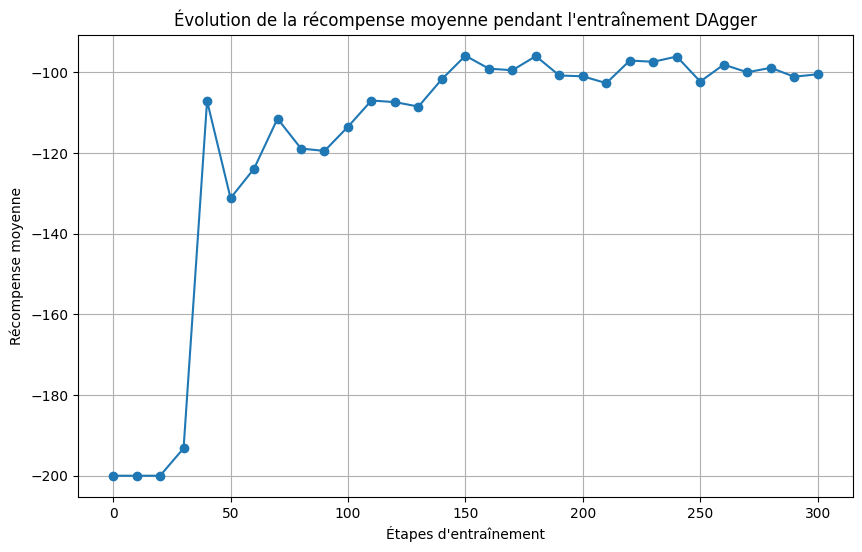

Évaluation de la politique entraînée...


In [4]:
# Programme Principal
if __name__ == "__main__":
    env_name = "seals:seals/MountainMountainCar-v0"
    expert_name = "ppo-huggingface"
    organization = "HumanCompatibleAI"

    # Initialisation de l'environnement et de l'expert
    print("Initialisation de l'environnement et chargement de l'expert...")
    env, expert = setup_environment(env_name, expert_name, organization)
    
    # Entraînement avec DAgger
    print("Entraînement avec DAgger en cours...")
    dagger_trainer, rewards_over_time = train_with_dagger(env, expert, steps=300, eval_intervals=10)
    
    # Tracé de la récompense
    print("Tracé de la récompense...")
    plot_rewards(rewards_over_time, steps=300, eval_intervals=10)

    # Évaluation de la politique entraînée
    print("Évaluation de la politique entraînée...")
    

In [7]:
!python -m site


sys.path = [
    'c:\\Users\\Sorbonne\\Desktop\\projet\\Imitation_Learning_Project',
    'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\\python39.zip',
    'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\\DLLs',
    'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\\lib',
    'C:\\Users\\Sorbonne\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0',
    'C:\\Users\\Sorbonne\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages',
    'C:\\Users\\Sorbonne\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\win32',
    'C:\\Users\\Sorbonne\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Pytho